# Predicting the Severity of Traffic Accidents in Seattle, WA 

### Capstone Project for IBM Data Science on Coursera

## Data

### Looking at the Data

To begin, we will start looking at some attributes of the data.

In [145]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

low_memory = False

odf = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df = odf[['SEVERITYCODE', 'WEATHER', 'ROADCOND','LIGHTCOND','INATTENTIONIND','SPEEDING','UNDERINFL','JUNCTIONTYPE','PERSONCOUNT','VEHCOUNT']]
df.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,SPEEDING,UNDERINFL,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT
0,2,Overcast,Wet,Daylight,NaN,NaN,N,At Intersection (intersection related),2,2
1,1,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,Mid-Block (not related to intersection),2,2
2,1,Overcast,Dry,Daylight,NaN,NaN,0,Mid-Block (not related to intersection),4,3
3,1,Clear,Dry,Daylight,NaN,NaN,N,Mid-Block (not related to intersection),3,3
4,2,Raining,Wet,Daylight,NaN,NaN,0,At Intersection (intersection related),2,2
5,1,Clear,Dry,Daylight,NaN,NaN,N,At Intersection (intersection related),2,2
6,1,Raining,Wet,Daylight,NaN,NaN,0,At Intersection (intersection related),2,2
7,2,Clear,Dry,Daylight,NaN,NaN,N,At Intersection (intersection related),3,1
8,1,Clear,Dry,Daylight,NaN,NaN,0,Mid-Block (not related to intersection),2,2
9,2,Clear,Dry,Daylight,NaN,NaN,0,At Intersection (intersection related),2,2


In [146]:
df.describe()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
count,194673.000000,194673.000000,194673.000000
mean,1.298901,2.444427,1.920780
std,0.457778,1.345929,0.631047
min,1.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000
50%,1.000000,2.000000,2.000000
75%,2.000000,3.000000,2.000000
max,2.000000,81.000000,12.000000


In [151]:
List1df = pd.DataFrame([df['ROADCOND'].value_counts()])
List1df

,Dry,Wet,Unknown,Ice,Snow/Slush,Other,Standing Water,Sand/Mud/Dirt,Oil
ROADCOND,124510,47474,15078,1209,1004,132,115,75,64


In [152]:
List2df = pd.DataFrame([df['WEATHER'].value_counts()])
List2df

,Clear,Raining,Overcast,Unknown,Snowing,Other,Fog/Smog/Smoke,Sleet/Hail/Freezing Rain,Blowing Sand/Dirt,Severe Crosswind,Partly Cloudy
WEATHER,111135,33145,27714,15091,907,832,569,113,56,25,5


In [153]:
List3df = pd.DataFrame([df['LIGHTCOND'].value_counts()])
List3df

,Daylight,Dark - Street Lights On,Unknown,Dusk,Dawn,Dark - No Street Lights,Dark - Street Lights Off,Other,Dark - Unknown Lighting
LIGHTCOND,116137,48507,13473,5902,2502,1537,1199,235,11


In [50]:
List4df = pd.DataFrame([df['SPEEDING'].value_counts()])
List4df

,Y
SPEEDING,9333


In [51]:
List5df = pd.DataFrame([df['INATTENTIONIND'].value_counts()])
List5df

,Y
INATTENTIONIND,29805


In [52]:
List6df = pd.DataFrame([df['UNDERINFL'].value_counts()])
List6df

,N,0,Y,1
UNDERINFL,100274,80394,5126,3995


In [53]:
List7df = pd.DataFrame([df['JUNCTIONTYPE'].value_counts()])
List7df

,Mid-Block (not related to intersection),At Intersection (intersection related),Mid-Block (but intersection related),Driveway Junction,At Intersection (but not related to intersection),Ramp Junction,Unknown
JUNCTIONTYPE,89800,62810,22790,10671,2098,166,9


In [54]:
List8df = pd.DataFrame([df['PERSONCOUNT'].value_counts()])
List8df

,2,3,4,1,5,0,6,7,8,9,...,57,31,35,39,41,43,48,53,54,81
PERSONCOUNT,114231,35553,14660,13154,6584,5544,2702,1131,533,216,...,1,1,1,1,1,1,1,1,1,1


In [55]:
List9df = pd.DataFrame([df['VEHCOUNT'].value_counts()])
List9df

,2,1,3,0,4,5,6,7,8,9,11,10,12
VEHCOUNT,147650,25748,13010,5085,2426,529,146,46,15,9,6,2,1


In [56]:
SCdf = pd.DataFrame([df['SEVERITYCODE'].value_counts()])
SCdf

,1,2
SEVERITYCODE,136485,58188


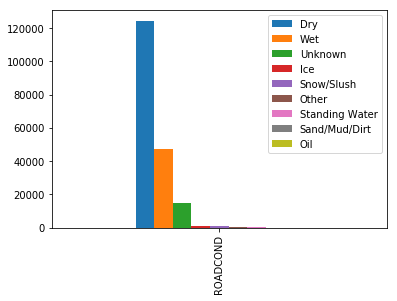

In [154]:
List1df.plot(kind="bar", rot=90)

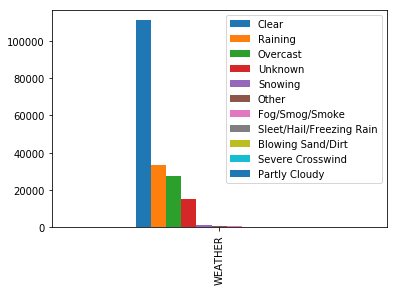

In [155]:
List2df.plot(kind="bar", rot=90)

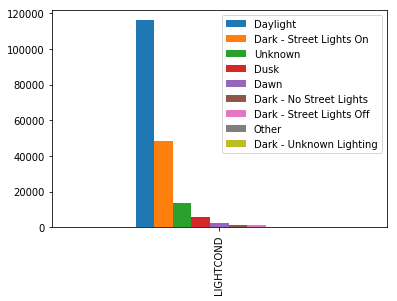

In [156]:
List3df.plot(kind="bar", rot=90)

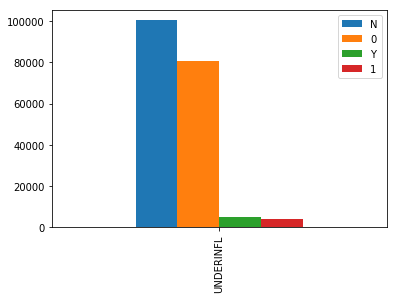

In [159]:
List6df.plot(kind="bar", rot=90)

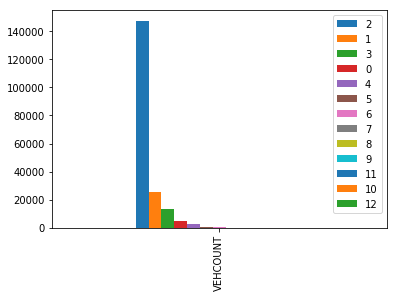

In [168]:
List9df.plot(kind="bar", rot=90)

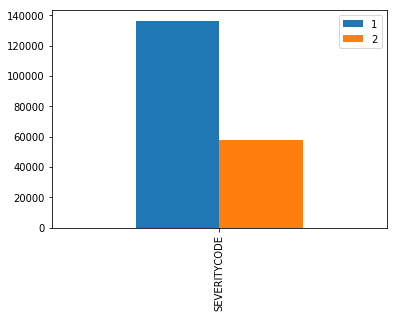

In [169]:
SCdf.plot(kind="bar", rot=90)

As seen above, there are many observations that are labelled with "Unknown" or "Other"; these values will be dropped from the dataset, and observations with rare weather and road conditions will be combined. In addition, the dataset is severely imbalanced; therefore the dataset must be balanced before it can be used to fit and train a machine learning model.

## Cleaning the Data

In [57]:
df.replace("Unknown", np.nan, inplace = True)
df.replace("Other", np.nan, inplace = True)
df['SPEEDING'].replace(np.nan, "N", inplace = True)
df['INATTENTIONIND'].replace(np.nan, "N", inplace=True)
df['UNDERINFL'].replace("0","Y", inplace = True)
df['UNDERINFL'].replace("1","Y", inplace = True)
df['UNDERINFL'].replace(np.nan,"N", inplace = True)
df.replace("Dark - Unknown Lighting", np.nan, inplace = True)

df.head(5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,SPEEDING,UNDERINFL,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT
0,2,Overcast,Wet,Daylight,N,N,N,At Intersection (intersection related),2,2
1,1,Raining,Wet,Dark - Street Lights On,N,N,Y,Mid-Block (not related to intersection),2,2
2,1,Overcast,Dry,Daylight,N,N,Y,Mid-Block (not related to intersection),4,3
3,1,Clear,Dry,Daylight,N,N,N,Mid-Block (not related to intersection),3,3
4,2,Raining,Wet,Daylight,N,N,Y,At Intersection (intersection related),2,2


In [58]:
#count nan values, where True = nan
missing = df.isnull()
for column in missing.columns.values.tolist():
    print(column)
    print (missing[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

WEATHER
False    173669
True      21004
Name: WEATHER, dtype: int64

ROADCOND
False    174451
True      20222
Name: ROADCOND, dtype: int64

LIGHTCOND
False    175784
True      18889
Name: LIGHTCOND, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64

UNDERINFL
False    194673
Name: UNDERINFL, dtype: int64

JUNCTIONTYPE
False    188335
True       6338
Name: JUNCTIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64



In [59]:
#drop nan values
df.dropna(subset=['WEATHER', 'ROADCOND','LIGHTCOND','INATTENTIONIND', 'SPEEDING','UNDERINFL','JUNCTIONTYPE'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,SPEEDING,UNDERINFL,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT
0,2,Overcast,Wet,Daylight,N,N,N,At Intersection (intersection related),2,2
1,1,Raining,Wet,Dark - Street Lights On,N,N,Y,Mid-Block (not related to intersection),2,2
2,1,Overcast,Dry,Daylight,N,N,Y,Mid-Block (not related to intersection),4,3
3,1,Clear,Dry,Daylight,N,N,N,Mid-Block (not related to intersection),3,3
4,2,Raining,Wet,Daylight,N,N,Y,At Intersection (intersection related),2,2


In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [61]:
le.fit(df['ROADCOND'])
a=le.transform(df['ROADCOND'])

In [62]:
le.fit(df['WEATHER'])
b = le.transform(df['WEATHER'])

In [63]:
le.fit(df['LIGHTCOND'])
c=le.transform(df['LIGHTCOND'])

In [64]:
le.fit(df['SPEEDING'])
d=le.transform(df['SPEEDING'])

In [65]:
le.fit(df['INATTENTIONIND'])
e=le.transform(df['INATTENTIONIND'])

In [66]:
le.fit(df['UNDERINFL'])
f=le.transform(df['UNDERINFL'])

In [67]:
le.fit(df['JUNCTIONTYPE'])
g=le.transform(df['JUNCTIONTYPE'])

In [68]:
le.fit(df['PERSONCOUNT'])
h=le.transform(df['PERSONCOUNT'])

In [69]:
le.fit(df['VEHCOUNT'])
j=le.transform(df['VEHCOUNT'])

In [70]:
#Create new dataframe with the encoded attributes
df2 = pd.DataFrame({'ROADCOND':a,'WEATHER':b,'LIGHTCOND':c,'SPEEDING':d,'INATTENTIONIND':e,'UNDERINFL':f,'JUNCTIONTYPE':g, 'PERSONCOUNT':h,'VEHCOUNT':j})

#combine severitycode and new dataframe
df = pd.concat([df2, df['SEVERITYCODE']], axis=1)
df.head()

,ROADCOND,WEATHER,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SEVERITYCODE
0,6,3,4,0,0,0,1,2,2,2
1,6,5,2,0,0,1,4,2,2,1
2,0,3,4,0,0,1,4,4,3,1
3,0,1,4,0,0,0,4,3,3,1
4,6,5,4,0,0,1,1,2,2,2


In [71]:
#labels
df['SEVERITYCODE'].value_counts()

1    112119
2     55347
Name: SEVERITYCODE, dtype: int64

### Balancing the Dataset - downsampling

In [72]:
from sklearn.utils import resample

df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=55347, random_state=123)
df = pd.concat([df_minority, df_majority_downsampled])
print(df['SEVERITYCODE'].value_counts())

2    55347
1    55347
Name: SEVERITYCODE, dtype: int64


### Feature Selection & Data Pre-processing

In [73]:
#Feature Selection
Feature = df[['ROADCOND','WEATHER','LIGHTCOND','INATTENTIONIND','SPEEDING','UNDERINFL','JUNCTIONTYPE','PERSONCOUNT','VEHCOUNT']]
X = Feature.astype(int)
X.head()

,ROADCOND,WEATHER,LIGHTCOND,INATTENTIONIND,SPEEDING,UNDERINFL,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT
0,6,3,4,0,0,0,1,2,2
4,6,5,4,0,0,1,1,2,2
7,0,1,4,0,0,0,1,3,1
9,0,1,4,0,0,1,1,2,2
14,0,1,2,0,0,0,4,2,2


In [74]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 2, 2, 2, 2])

In [75]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 1.61585833,  0.53158442,  0.57569636, -0.45631738, -0.24247994,
        -0.94773836, -1.12373761, -0.40434144,  0.07110626],
       [ 1.61585833,  1.74889993,  0.57569636, -0.45631738, -0.24247994,
         1.05514353, -1.12373761, -0.40434144,  0.07110626],
       [-0.62525909, -0.68573109,  0.57569636, -0.45631738, -0.24247994,
        -0.94773836, -1.12373761,  0.30766536, -1.54944897],
       [-0.62525909, -0.68573109,  0.57569636, -0.45631738, -0.24247994,
         1.05514353, -1.12373761, -0.40434144,  0.07110626],
       [-0.62525909, -0.68573109, -1.44315755, -0.45631738, -0.24247994,
        -0.94773836,  1.03924577, -0.40434144,  0.07110626]])

### Train/Test Split

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3,random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (77485, 9) (77485,)
Test set: (33209, 9) (33209,)


In [123]:
y_test[0:5]

array([2, 2, 2, 1, 1])

In [124]:
y_train[0:5]

array([1, 2, 2, 1, 2])

## ML Modelling

### 1. Logical Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
yhat = LR.predict(X_test)
yhat

array([2, 2, 2, ..., 2, 2, 1])

In [127]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.49697164, 0.50302836],
       [0.46170888, 0.53829112],
       [0.44050777, 0.55949223],
       ...,
       [0.49817398, 0.50182602],
       [0.38808994, 0.61191006],
       [0.51754255, 0.48245745]])

Feature: 0, Score: 0.02166
Feature: 1, Score: -0.01420
Feature: 2, Score: 0.07919
Feature: 3, Score: 0.08695
Feature: 4, Score: 0.09994
Feature: 5, Score: -0.04876
Feature: 6, Score: -0.35051
Feature: 7, Score: 0.44230
Feature: 8, Score: -0.32794


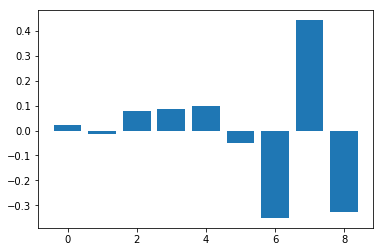

In [128]:
importance = LR.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### 2. Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier(criterion="entropy")
DTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [130]:
DTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [131]:
PTree = DTree.predict(X_test)
PTree[0:5]

array([1, 2, 1, 1, 2])

### 3. K-Nearest Neighbour

In [132]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
KNNM = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNNM

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [133]:
yhat = KNNM.predict(X_test)
yhat[0:5]

array([2, 2, 1, 1, 2])

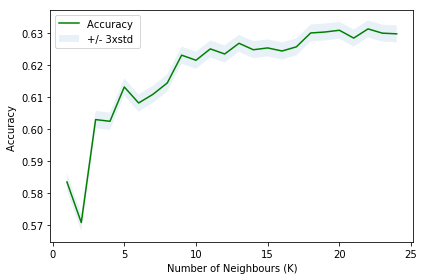

In [135]:
from sklearn import metrics

Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
     
    KNNM = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = KNNM.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [136]:
#Best KNN Model
k = 23
KNNM = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNNM

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform')

### Model Evaluation with Test Set

In [137]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [138]:
testdf = df.sample(frac =.30)
testdf.head()

,ROADCOND,WEATHER,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SEVERITYCODE
116891,0,1,4,0,0,0,4,2,2,1
96050,6,5,4,0,0,0,4,2,2,1
100835,0,1,4,0,0,0,1,2,1,2
154207,0,3,4,0,1,0,1,3,2,2
109712,6,5,2,0,0,0,1,2,1,2


In [139]:
test_Feature = testdf[['ROADCOND','WEATHER','LIGHTCOND','INATTENTIONIND','SPEEDING','UNDERINFL','JUNCTIONTYPE','PERSONCOUNT','VEHCOUNT']]
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature.astype(float))
test_X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-0.62645226, -0.68490707,  0.57851665, -0.4549649 , -0.24051847,
        -0.94553075,  1.03923305, -0.39746748,  0.08188093],
       [ 1.61185779,  1.75181823,  0.57851665, -0.4549649 , -0.24051847,
        -0.94553075,  1.03923305, -0.39746748,  0.08188093],
       [-0.62645226, -0.68490707,  0.57851665, -0.4549649 , -0.24051847,
        -0.94553075, -1.11913405, -0.39746748, -1.5502331 ],
       [-0.62645226,  0.53345558,  0.57851665,  2.19797177, -0.24051847,
        -0.94553075, -1.11913405,  0.31441969,  0.08188093],
       [ 1.61185779,  1.75181823, -1.44757288, -0.4549649 , -0.24051847,
        -0.94553075, -1.11913405, -0.39746748, -1.5502331 ]])

In [140]:
test_y = testdf['SEVERITYCODE'].values
test_y[0:5]

array([1, 1, 2, 2, 2])

In [141]:
KNNyhat = KNNM.predict(test_X)
print("Jaccard:", jaccard_similarity_score(test_y, KNNyhat).round(2))
print("F1:", f1_score(test_y, KNNyhat, average='weighted').round(2) )

Jaccard: 0.64
F1: 0.64


In [142]:
DTyhat = DTree.predict(test_X)
print("Jaccard:", jaccard_similarity_score(test_y, DTyhat).round(2))
print("F1:", f1_score(test_y, DTyhat, average='weighted').round(2) )

Jaccard: 0.67
F1: 0.67


In [143]:
LRyhat = LR.predict(test_X)
LRyhat_prob = LR.predict_proba(test_X)
print("Jaccard:", jaccard_similarity_score(test_y, LRyhat).round(2))
print("F1:", f1_score(test_y, LRyhat, average='weighted').round(2))
print("LogLoss:", log_loss(test_y, LRyhat_prob).round(2))

Jaccard: 0.62
F1: 0.62
LogLoss: 0.66
